<a href="https://colab.research.google.com/github/sigdelina/NorBench/blob/main/Wordnet_dataset_wsd_wsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/работа/Norwegian Benchmark

In [ ]:
!pip install rdflib
!pip install conllu

In [8]:
import pandas as pd
import conllu
import re
from tqdm.auto import tqdm

The dataset from the Norwegian National Library Wordnet is organized as shown below. 

In conllu file the last state (10th column) provides information about synsets ids.

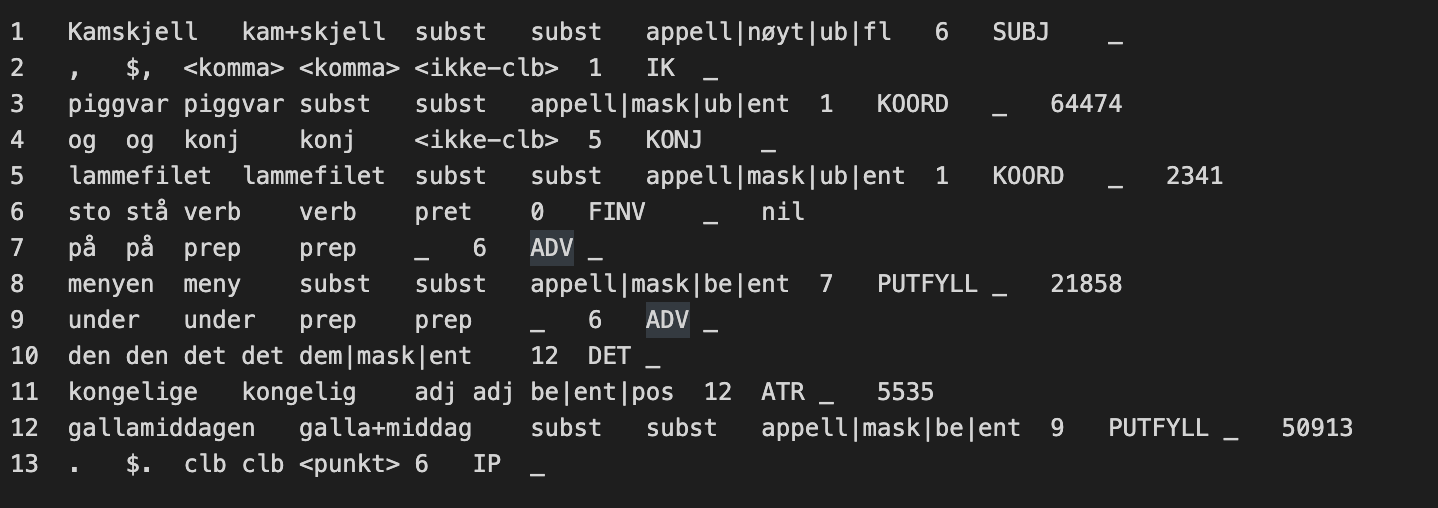

In [9]:
data = pd.read_csv('data/corpus-all_synsets_dataset.csv')

In [11]:
data

,id,sentence,sense_key,lemma,pos,targets
0,d0000.s0000.t0000,[TGT] Lam [TGT] og piggvar på bryllupsmenyen |,"['46605', '59170', '46604']",lam,subst,[1]
1,d0000.s0000.t0001,Lam og [TGT] piggvar [TGT] på bryllupsmenyen |,['64474'],piggvar,subst,[0]
2,d0000.s0000.t0002,Lam og piggvar på [TGT] bryllupsmenyen [TGT] |,['21858'],bryllups+meny,subst,[0]
3,d0000.s0001.t0000,"Kamskjell , [TGT] piggvar [TGT] og lammefilet ...",['64474'],piggvar,subst,[0]
4,d0000.s0001.t0001,"Kamskjell , piggvar og [TGT] lammefilet [TGT] ...",['2341'],lammefilet,subst,[0]
...,...,...,...,...,...,...
4945,d0000.s3093.t0001,"Jeg registrerer at Johnsen denne gangen , som ...",['14637'],fornøyd,adj,[0]
4946,d0000.s3094.t0000,"Hvis det kan blidgjøre Jan Johnsen , skal jeg ...","['8580', '8328', '19964', '7303', '28637']",virke,verb,[1]
4947,d0000.s3094.t0001,"Hvis det kan blidgjøre Jan Johnsen , skal jeg ...",['16836'],nybil+salg,subst,[0]
4948,d0000.s3095.t0000,Men det var ikke antall solgte nybiler som var...,"['590', '12541', '496', '26177', '38459']",rest,subst,[0]


## Getting relevant sunset for each [TGT] ... [TGT] word

In [12]:
def gold_synset(df):
  
  gold_k = []
  for ind, row in tqdm(df.iterrows()):
    nums_target = re.findall(r'\d+', row.targets)
    nums_syns = re.findall(r'\d+', row.sense_key)
    gold_k.append(nums_syns[int(nums_target[0])])

  return gold_k

In [13]:
data['gold_keys'] = gold_synset(data)

0it [00:00, ?it/s]

In [14]:
data

,id,sentence,sense_key,lemma,pos,targets,gold_keys
0,d0000.s0000.t0000,[TGT] Lam [TGT] og piggvar på bryllupsmenyen |,"['46605', '59170', '46604']",lam,subst,[1],59170
1,d0000.s0000.t0001,Lam og [TGT] piggvar [TGT] på bryllupsmenyen |,['64474'],piggvar,subst,[0],64474
2,d0000.s0000.t0002,Lam og piggvar på [TGT] bryllupsmenyen [TGT] |,['21858'],bryllups+meny,subst,[0],21858
3,d0000.s0001.t0000,"Kamskjell , [TGT] piggvar [TGT] og lammefilet ...",['64474'],piggvar,subst,[0],64474
4,d0000.s0001.t0001,"Kamskjell , piggvar og [TGT] lammefilet [TGT] ...",['2341'],lammefilet,subst,[0],2341
...,...,...,...,...,...,...,...
4945,d0000.s3093.t0001,"Jeg registrerer at Johnsen denne gangen , som ...",['14637'],fornøyd,adj,[0],14637
4946,d0000.s3094.t0000,"Hvis det kan blidgjøre Jan Johnsen , skal jeg ...","['8580', '8328', '19964', '7303', '28637']",virke,verb,[1],8328
4947,d0000.s3094.t0001,"Hvis det kan blidgjøre Jan Johnsen , skal jeg ...",['16836'],nybil+salg,subst,[0],16836
4948,d0000.s3095.t0000,Men det var ikke antall solgte nybiler som var...,"['590', '12541', '496', '26177', '38459']",rest,subst,[0],590


## Statistics

---

### Lemmas distribution


In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install chart_studio

In [ ]:
# Стандартное импортирование plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

# Использование cufflinks в офлайн-режиме
import cufflinks
cufflinks.go_offline()

# Настройка глобальной темы cufflinks
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [ ]:
# max_lemmas = lemmas_counter[lemmas_counter['lemma'] > 10]

In [ ]:
# max_lemmas

In [18]:
data.lemma.unique().shape

(1327,)

In [19]:
lemmas_counter = pd.DataFrame(data.lemma.value_counts())
# lemmas_counter.columns = ['lemma', 'count']

max_lemmas = lemmas_counter[lemmas_counter['lemma'] >= 5]
min_lemmas = lemmas_counter[lemmas_counter['lemma'] < 5]
most_problematic = lemmas_counter[lemmas_counter['lemma'] == 1]

In [20]:
lemmas_counter.describe()

,lemma
count,1327.000000
mean,3.730219
std,3.639218
min,1.000000
25%,1.000000
50%,1.000000
75%,7.000000
max,20.000000


In [21]:
max_lemmas

,lemma
tro,20
støtte,18
ønske,18
møte,17
være,16
...,...
flyktning,5
politikk,5
ekspert,5
hete,5


In [22]:
min_lemmas

,lemma
peke,4
forsker,4
beskjed,4
åpne,4
direktør,4
...,...
kraft+produsent,1
gratis+kvote,1
start,1
krise,1


In [23]:
most_problematic

,lemma
realitet,1
klarsignal,1
pensjons+beløp,1
serie+åpne,1
treparti+regjering,1
...,...
kraft+produsent,1
gratis+kvote,1
start,1
krise,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


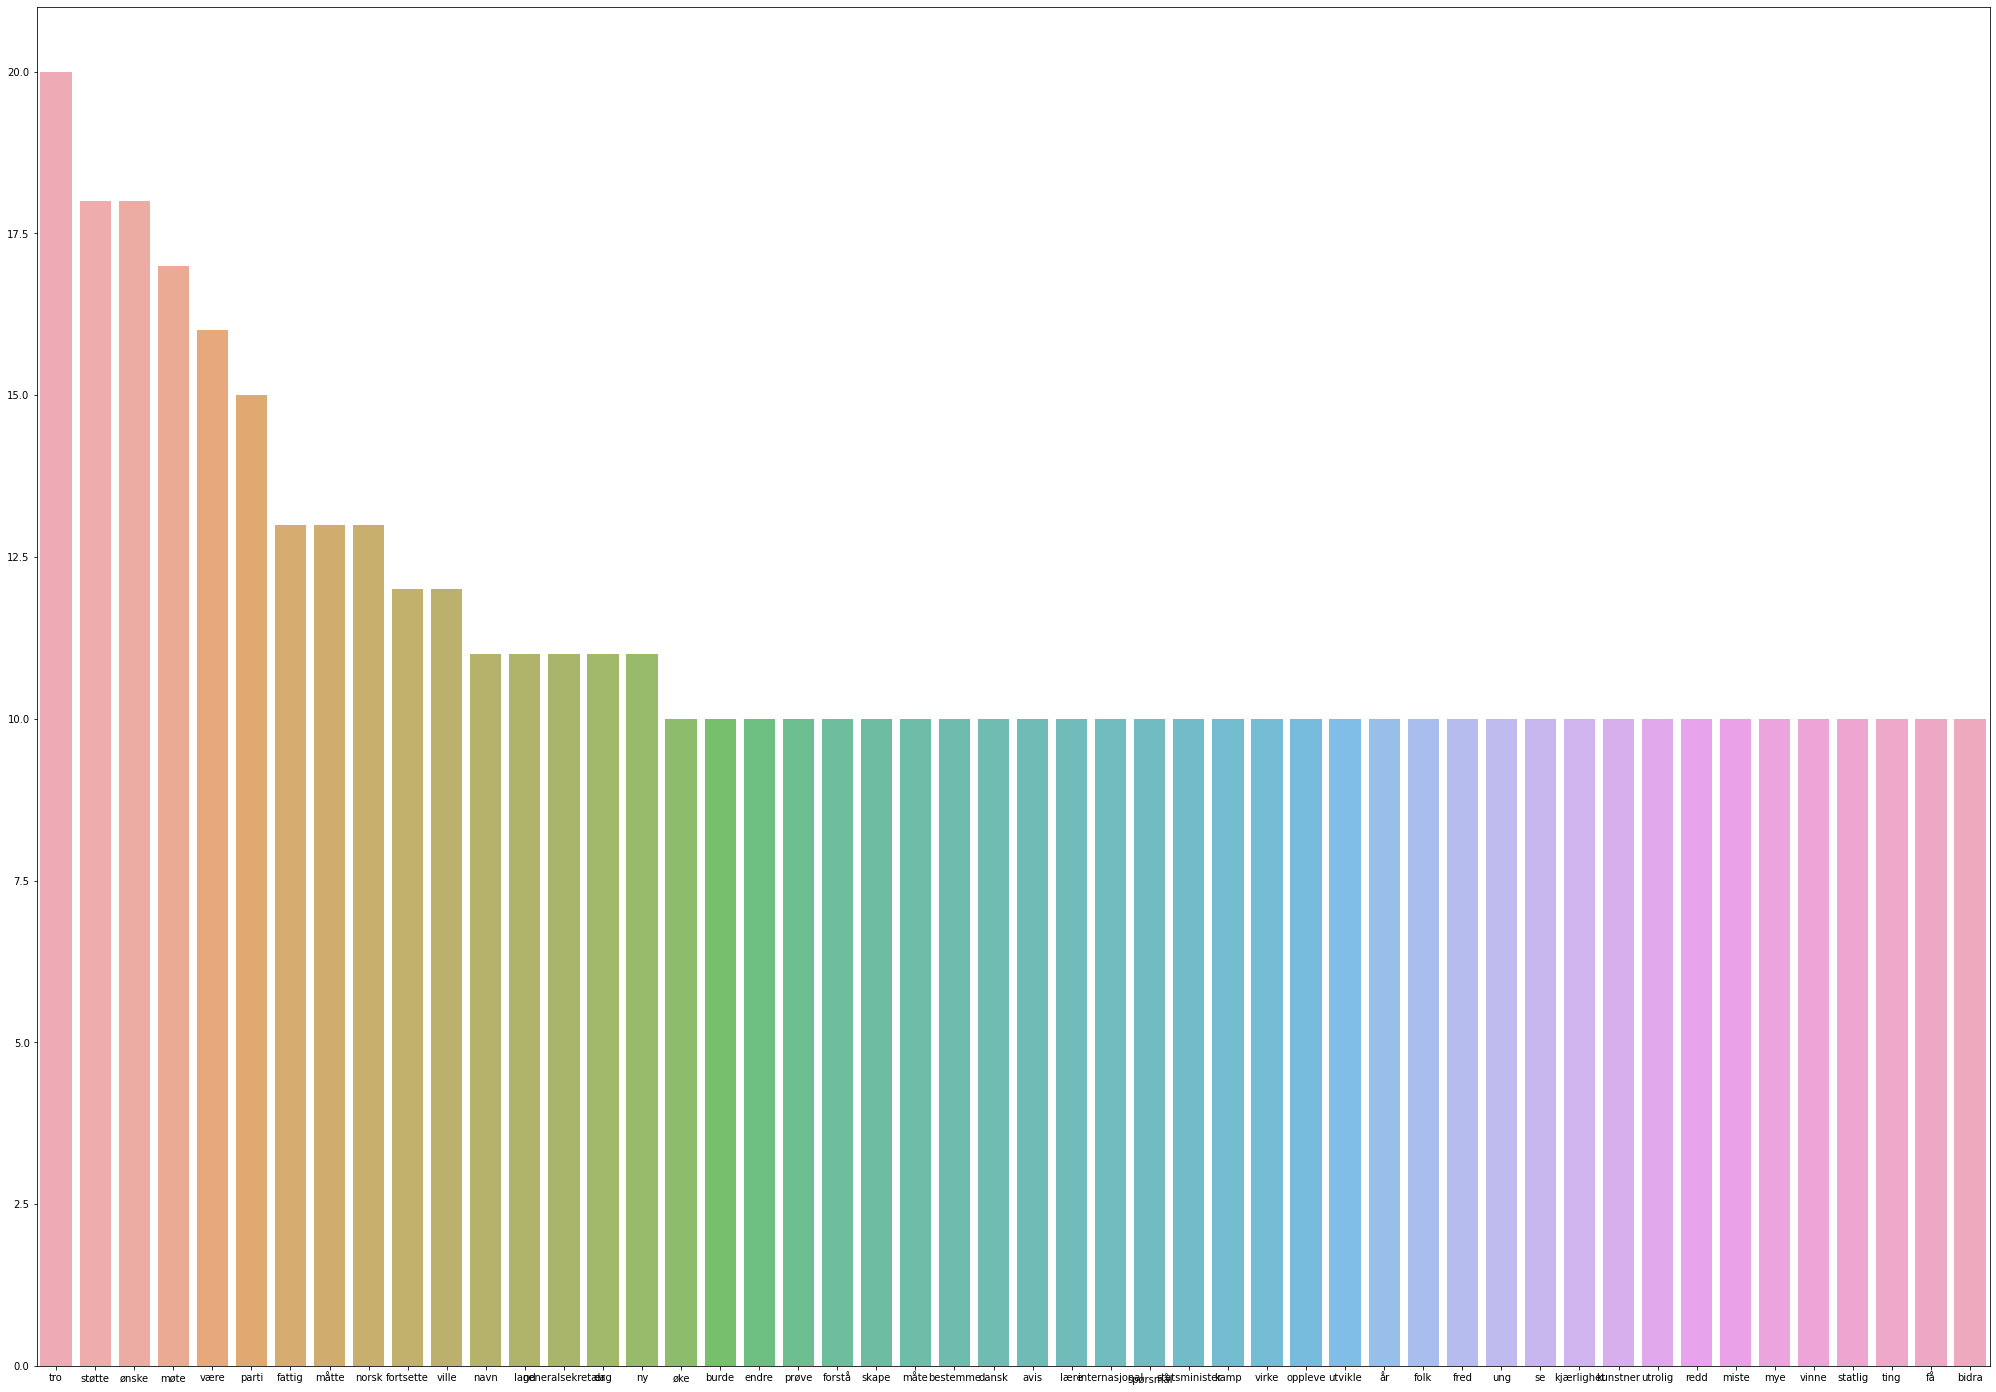

In [ ]:
Lemmas_Count = data.lemma.value_counts(sort=True).nlargest(50)
plt.figure(figsize=(35,25))
sns.barplot(Lemmas_Count.index, Lemmas_Count.values, alpha=0.8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



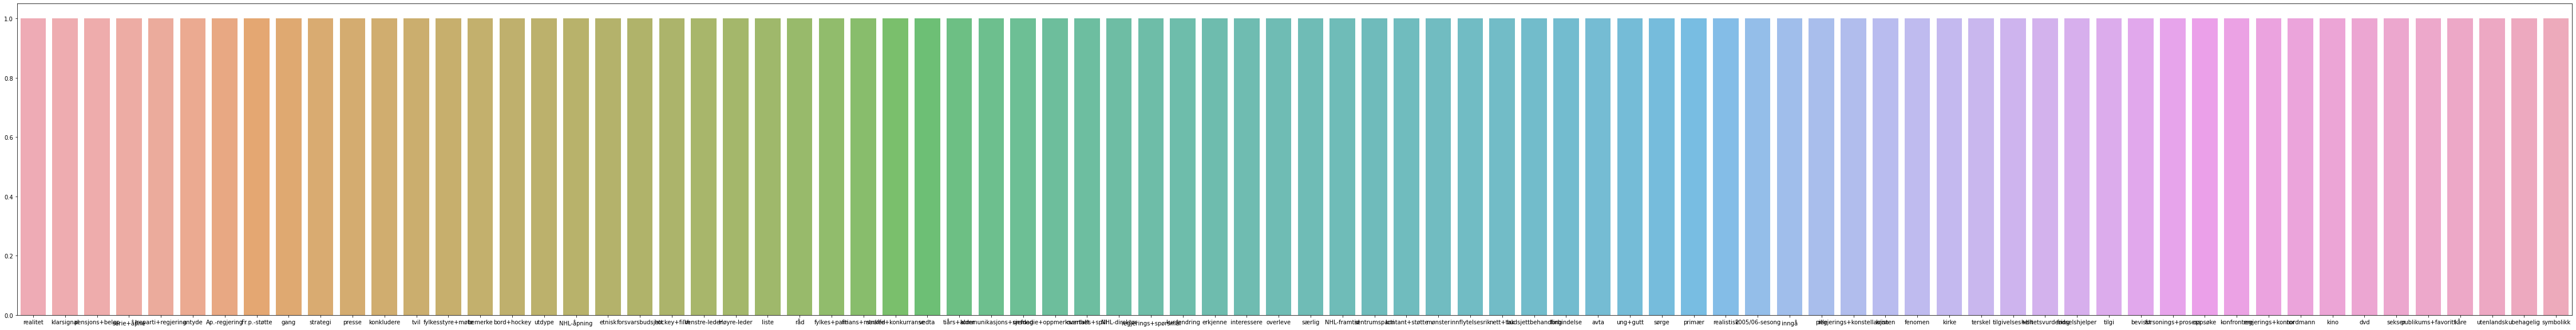

In [ ]:
Lemmas_Count = data.lemma.value_counts(sort=True).nsmallest(80)
plt.figure(figsize=(80,10))
sns.barplot(Lemmas_Count.index, Lemmas_Count.values, alpha=0.8)
plt.show()

In [ ]:
import matplotlib
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [105]:
# Interactive graph with lemmas counting


fig = go.Figure(
    layout=dict(title=dict(text="Lemma's distribution"))
)

fig.add_bar(x=data.lemma.value_counts().index.tolist(), y=data.lemma.value_counts().values.tolist(),
              marker=dict(color="red"))
              
                         

fig.show(renderer="colab")

### Compaunds

In [26]:
comp = data[data['lemma'].str.contains(".\+", regex=True)]

In [27]:
comp

,id,sentence,sense_key,lemma,pos,targets,gold_keys
2,d0000.s0000.t0002,Lam og piggvar på [TGT] bryllupsmenyen [TGT] |,['21858'],bryllups+meny,subst,[0],21858
7,d0000.s0001.t0004,"Kamskjell , piggvar og lammefilet sto på menye...",['50913'],galla+middag,subst,[0],50913
14,d0000.s0003.t0005,"Forretten lyder navnet ""Coquilles St. Jacques ...",['63339'],speke+skinke,subst,[0],63339
15,d0000.s0003.t0006,"Forretten lyder navnet ""Coquilles St. Jacques ...",['50783'],ruccola+salat,subst,[0],50783
17,d0000.s0003.t0008,"Forretten lyder navnet ""Coquilles St. Jacques ...",['10763'],gresskar+kjerne,subst,[0],10763
...,...,...,...,...,...,...,...
4888,d0000.s3045.t0007,La meg først få understreke at Regjeringen gir...,['52034'],gass+kraftverk,subst,[0],52034
4919,d0000.s3062.t0002,Jeg må si at når statsråden opererer med først...,['16836'],nybil+salg,subst,[0],16836
4922,d0000.s3063.t0001,I mitt spørsmål spurte jeg tydelig om [TGT] ny...,['16836'],nybil+salg,subst,[0],16836
4928,d0000.s3073.t0001,Det som var temaet i spørsmålet den 24. novemb...,['16836'],nybil+salg,subst,[0],16836


In [28]:
more_one = 0
for ind, val in comp.lemma.value_counts().items():
  print('IND', ind)
  print('VALUES', val)
  print('====')
  if val > 1:
    more_one += 1

IND gass+kraftverk
VALUES 9
====
IND første+kandidat
VALUES 7
====
IND fredspris+vinner
VALUES 6
====
IND utenriks+komité
VALUES 5
====
IND leder+verv
VALUES 4
====
IND rasisme+paragraf
VALUES 4
====
IND nybil+salg
VALUES 4
====
IND konkurranse+dans
VALUES 3
====
IND navne+forsker
VALUES 3
====
IND familie+piano
VALUES 3
====
IND regjerings+koalisjon
VALUES 3
====
IND papir+utgave
VALUES 3
====
IND kultur+felt
VALUES 3
====
IND fugle+influensa
VALUES 3
====
IND sykehjems+plass
VALUES 3
====
IND hoved+bord
VALUES 3
====
IND freds+begrep
VALUES 2
====
IND stortings+valg
VALUES 2
====
IND sikkerhets+personale
VALUES 2
====
IND røntgen+maskin
VALUES 2
====
IND film+regissør
VALUES 2
====
IND beste+foreldre
VALUES 2
====
IND fele+spiller
VALUES 2
====
IND grunn+økonomi
VALUES 2
====
IND påvirknings+kraft
VALUES 2
====
IND gutte+rom
VALUES 2
====
IND komité+leder
VALUES 2
====
IND styrings+koalisjon
VALUES 2
====
IND æres+begrep
VALUES 2
====
IND operasjons+sentral
VALUES 2
====
IND freds+te

In [29]:
more_one

41

### Synsets and UPOS-tags

In [55]:
import numpy as np

In the dataset from Norwegian Wordnet (from Norwegian National Library). Due to the fact of using specific approach to conllu file organozation, there is no adverbs marked with synsets. 


In [63]:
data.pos.value_counts()

subst    2890
verb     1286
adj       774
Name: pos, dtype: int64

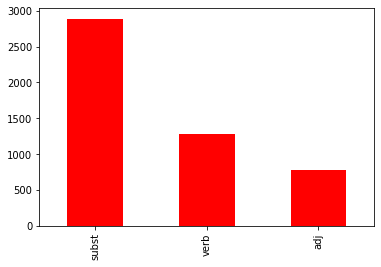

In [82]:
data.pos.value_counts().plot(kind="bar", color='red')

In [142]:
data_pos_gold = data.groupby(['pos', 'gold_keys'])['lemma'].count()

In [140]:
data_pos_gold

pos    gold_keys
subst  59170        2
       64474        3
       21858        2
       2341         1
adj    5535         8
                   ..
subst  24306        8
       38996        7
adj    5549         1
verb   54544        1
subst  40146        1
Name: lemma, Length: 1464, dtype: int64

In [141]:
fig = make_subplots(
    rows=3, cols=1)

fig.add_trace(go.Scatter(
    x=data_pos_gold['verb'].index.tolist(),
    y=data_pos_gold['verb'].values.tolist(),
    name='verb',
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=data_pos_gold['subst'].index.tolist(),
    y=data_pos_gold['subst'].values.tolist(),
    name='noun',
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=data_pos_gold['adj'].index.tolist(),
    y=data_pos_gold['adj'].values.tolist(),
    name='adjective',
), row=3, col=1)


fig.update_layout(height=800, width=800, title_text="POS-tags and synsets")
fig.show(renderer="colab")